In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dir_path = ""
tuition_data = pd.read_csv(dir_path + "Harvard-College-Costs-cleaninflation.csv")

#NEED TO DO: create list of total cost of attendance (adjusted for inflation)
#NEED TO DO: perform linear regression on median income per household to predict value for 2020
#NEED TO DO: plot total COA per academic year and compare against median income per household

#OPTIONAL: create list of total fees (health services + student services)

tuition_data.head()

,year,tuition,health_fee,student_fee,room,board,total_cost,growth_rate,inflation_yoy,inflation_by2019,static,adjusted_cost,median_income
0,2020,47730,1206,2989,10927,6755,69607,0.030,1.9,1.019000,1.019000,68309.12659,NaN
1,2019,46340,1178,2902,10609,6551,67580,0.030,1.5,1.000000,1.000000,67580.00000,64430.0
2,2018,44990,1142,2817,10300,6360,65609,0.041,1.9,0.985000,0.985000,66608.12183,63179.0
3,2017,43280,1088,2706,9894,6057,63025,0.039,2.1,0.966285,0.966285,65224.02811,61136.0
4,2016,41632,1042,2604,9523,5858,60659,0.035,2.1,0.945993,0.945993,64122.03794,59039.0


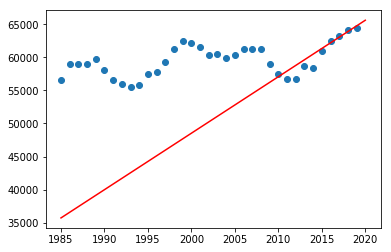

In [44]:
# remove 2020 from the current list of academic years and predict its value via linreg
lr = LinearRegression()
X = tuition_data.year.values.reshape(-1,1)
temp = tuition_data.median_income / tuition_data.inflation_by2019
Y = temp.values.reshape(-1,1)
lr.fit(X[1:6],Y[1:6])

Y_pred = lr.predict(X)
plt.scatter(X[1:], Y[1:])
plt.plot(X, Y_pred, color='red')
plt.show()

# add the predicted total COA in 2020
Y[0] = lr.predict(X[0].reshape(-1,1))

C:\Users\richa\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


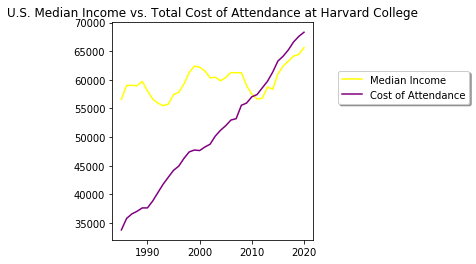

In [52]:
adjusted_cost = tuition_data.total_cost / tuition_data.inflation_by2019
#OR: adjusted_cost = tuition_data.adjusted_cost

Z = adjusted_cost.values.reshape(-1,1)

plt.title('U.S. Median Income vs. Total Cost of Attendance at Harvard College')
plt.plot(X,Y,color='yellow',linestyle='solid',label='Median Income')
plt.plot(X,Z,color='purple',linestyle = 'solid',label = 'Cost of Attendance')

ax = plt.subplot()
chartBox = ax.get_position(111)
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

In [53]:
#FUN FACT: It looks like the COA started to exceed the median income of workers in the U.S. circa 2010. Interestingly enough,
#Harvard College expanded its investment in undergraduate financial aid to $166 million in need-based scholarships, 10 million
#more than the previous year! Beginning in fall 2012, financial aid was also increased for low-income students by raising the
#income level under which parents pay nothing towards cost of attendance to $65,000.

#Future question worth considering: what will happen if the median income of U.S. workers drops again in the future, further
#increasing the gap between the cost of attendance and how much of it families can afford?

#Source:https://news.harvard.edu/gazette/story/2011/09/harvards-record-166-million-financial-aid-program-will-increase-aid-to-low-income-students-and-provide-a-new-financial-aid-calculator-for-students-and-families)